In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [5]:
def data_generator(numClasses, numElems):
    data = np.empty((sum(numElems), 2))
    target = np.empty(sum(numElems))
    
    for cl,n in zip(list(range(numClasses)), numElems):
        start_pos = sum(numElems[:cl])
        
        x_c, y_c = random.random()*5, random.random()*5
        data[start_pos:start_pos+n,:] = np.random.normal([x_c,y_c], 0.5, (n, 2))
        target[start_pos:start_pos+n] = np.full(n, cl)
        
    return data, target

In [13]:
data, target = data_generator(3, [100,100,100])

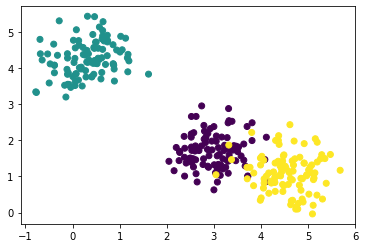

In [14]:
plt.scatter(data[:,0], data[:,1], c=target)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1, shuffle=True)

In [17]:
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.num_class = np.unique(y_train).shape[0]
        
    def predict(self, X_test):
        self.fit(train_data, train_target)
        y_pred=np.unique(self.num_class)
        return y_pred

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
y_pred=[]
for i in range(len(test_target)):
    a=KNN(i)
    y_pred.append(a.predict(test_data))
score = accuracy_score(test_target, y_pred)
score

0.0